In [19]:
%load_ext autoreload
%autoreload 2
import deepfly
import json
import os
from deepfly.CameraNetwork import CameraNetwork, json2points2d
import logging
import numpy as np
import matplotlib.pyplot as plt
import pickle
logging.getLogger().setLevel(logging.DEBUG)

# convert pose_result names into proper folder names
def get_image_path(s, image_name):
    img_path = '/data/paper/' + s.replace('_', "/").replace('/SG', '_SG').replace('/PR', "_PR").replace('/CsCh', '_CsCh').replace('/aDN', '_aDN').replace('/MDN', '_MDN') + '/' + image_name + '.jpg'
    return img_path

# never put this animal into the training data, only in the test data
test_folder = 'aDN_CsCh/Fly7'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# prepare old deepfly3d front camera annotations

In [20]:
d_old = json.load(open('drosophilaimaging-export (1).json', 'rb'))

annot_dict_old_train = {}

l = np.array([0,1,2,3,4,7,8,9])
for (_, d) in d_old.items():
    for folder in d['data'].keys():
        if folder in ['celegans_train', 'celegans_test', 'fish_test', 'fish_train', 'apr22_test7CamsMov', 'vlc_magnet_network', '2018-05-29--19-01-50--semih', 'images']:
            continue
        points2d = json2points2d(d['data'][folder], image_shape=[1,1], num_images=10000)
        points2d_clip = np.zeros((points2d.shape[1], 19, 2))
        points2d_clip[:, np.arange(l.size)] = points2d[3][:,l] # right legs
        points2d_clip[:, l.size + np.arange(l.size)] = points2d[3][:, 19+l] # left legs
        points2d_clip[:, -2] = points2d[3][:, 18] # antenna
        points2d_clip[:, -1] = points2d[3][:, 19+18] # antenna
        for img_id in range(points2d_clip.shape[0]):
            if np.any(points2d_clip[img_id] != 0):
                annot_dict_old_train[get_image_path(folder, 'camera_3_img_{:06d}'.format(img_id))] = points2d_clip[img_id]

    annot_dict_old_train = {k:v for (k,v) in annot_dict_old_train.items()}
    
annot_dict_old_train = {k.replace('paper','annot'):v for (k,v) in  annot_dict_old_train.items()}
annot_dict_old_train = {k:v for (k,v) in annot_dict_old_train.items() if os.path.isfile(k)}

# prepare gizem's annotations

In [115]:
import json
d_gizem = json.load(open('Final_deepfly3d-annotations-default-rtdb-export.json', 'rb'))['Fx2VfmROIScHXxHhOak5u5Hsy093']['data']
gizem_annot_dict = {}

l = np.array([0,1,2,3,4,7,8,9])
for folder in d_gizem.keys():
    #print(folder)
    points2d = json2points2d(d[folder], image_shape=[1,1], num_images=1000)[:, :900]
    points2d_clip = np.zeros((900, 19, 2))
    points2d_clip[:, np.arange(l.size)] = points2d[3][:,l] # right legs
    points2d_clip[:, l.size + np.arange(l.size)] = points2d[3][:, 19+l] # left legs
    points2d_clip[:, -2] = points2d[3][:, 18] # antenna
    points2d_clip[:, -1] = points2d[3][:, 19+18] # antenna
    for img_id in range(points2d_clip.shape[0]):
        if np.any(points2d_clip[img_id] != 0):
            gizem_annot_dict[get_image_path(folder, 'camera_3_img_{:06d}'.format(img_id))] = points2d_clip[img_id]
            
gizem_annot_dict_train = {k:v for (k,v) in gizem_annot_dict.items() if test_folder not in k}
gizem_annot_dict_test = {k:v for (k,v) in gizem_annot_dict.items() if test_folder in k}

print(gizem_annot_dict_train.keys() & gizem_annot_dict_test.keys())

set()


# test annotations

/data/paper/180918_MDN_CsCh/Fly1/002_SG1/behData/images/camera_3_img_000498.jpg
4432


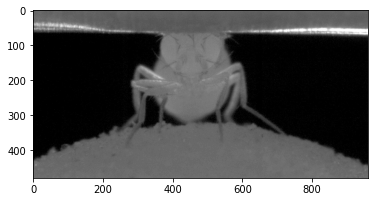

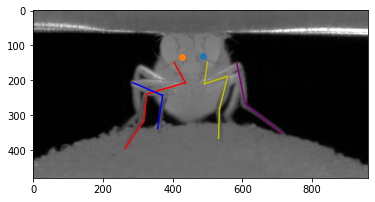

In [787]:
idx = np.random.randint(len(annot_dict_train))
k = list(annot_dict_train)[idx]
print(k)
print(idx)
plt.imshow(plt.imread(k), cmap='gray')
plt.figure()
plt.imshow(plt.imread(k), cmap='gray')
pts = annot_dict_train[k] * [960,480]
for i in range(4):
    plt.plot(pts[[i, i+1], 0], pts[[i, i+1], 1], c='r')
for i in range(5, 7):
    plt.plot(pts[[i, i+1], 0], pts[[i, i+1], 1], c='b')
    
for i in range(8, 12):
    plt.plot(pts[[i, i+1], 0], pts[[i, i+1], 1], c='y')
for i in range(13, 15):
    plt.plot(pts[[i, i+1], 0], pts[[i, i+1], 1], c='purple')
    
plt.scatter(pts[-1, 0], pts[-1, 1])
plt.scatter(pts[-2, 0], pts[-2, 1])

# calibrate and project gizem's annotations to generate more data

/home/user/Desktop/df3d_anomaly/pose_result/*180918_MDN_CsCh_Fly1_001*
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.9012e+05                                    9.52e+06    
       1              2         4.6421e+05      3.26e+05       2.16e+01       2.81e+06    
       2              3         4.3618e+05      2.80e+04       1.03e+00       6.52e+03    
       3              4         4.3618e+05      1.41e+00       5.09e-02       2.56e+02    
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 7.9012e+05, final cost 4.3618e+05, first-order optimality 2.56e+02.
skipping 154
skipping 201
skipping 206
skipping 242
skipping 311
skipping 432
skipping 457
skipping 899
/home/user/Desktop/df3d_anomaly/pose_result/*180918_MDN_CsCh_Fly1_002*
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1769e+06                  

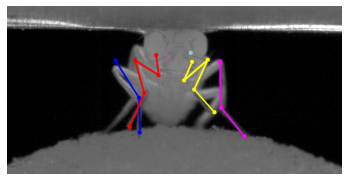

In [206]:
import glob
import pickle
from deepfly.CameraNetwork import json2points2d

ax = plt.gca()
ax.axis('off')
annot_dict_df3d_train = {}
l = np.array([0,1,2,3,4,7,8,9])

for k in list(d_gizem.keys()):
    pose_result_path = '/home/user/Desktop/df3d_anomaly/pose_result/' + '*' + k.replace('_SG1_behData_images', '') + '*'
    image_folder =  '/data/paper/' + k.replace('_', "/").replace('/SG', '_SG').replace('/PR', "_PR").replace('/CsCh', '_CsCh').replace('/aDN', '_aDN').replace('/MDN', '_MDN') + '/'
    print(pose_result_path)

    try:
        pose_result = pickle.load(open(glob.glob(pose_result_path)[0], 'rb'))
    except:
        continue

    camNet = CameraNetwork(image_folder=image_folder, output_folder='./test', num_images=900)
    for c  in range(7):
        camNet[c].points2d = pose_result['points2d'][c]

    # set sparse cam3 points
    points2d = json2points2d(d[k], image_shape=[960,480], num_images=1000)[3, :900]
    camNet[3].points2d = points2d

    # calibrate and triangulate
    camNet.set_default_camera_parameters()
    camNet.triangulate()
    
    # create a plot
    cam_id = 3
    img_id = 400
    ax.imshow(camNet[cam_id].plot_2d(img_id=img_id, pts=camNet[3].project(camNet.points3d[img_id])))
    plt.savefig('gizem_front/three_stripe/{}_img_{}_before_calibration.jpg'.format(image_folder.replace('/','_'), img_id))
    # create a plot
    
    camNet.calibrate(cam_id_list=[0,1,2,3,4,5,6])
    camNet.triangulate()
    
    err = camNet.reprojection_error().max(axis=0)

    # set cam3 points2d by projecting
    for i in range(898):
        camNet[3].points2d[i] = camNet[3].project(camNet.points3d[i])
    
    # create a plot for testing
    cam_id = 3
    img_id = 300
    ax.imshow(camNet[cam_id].plot_2d(img_id=img_id))
    plt.savefig('gizem_front/three_stripe/{}_img_{}.jpg'.format(image_folder.replace('/','_'), img_id))
    
    points2d = camNet[3].points2d
    points2d_clip = np.zeros((900, 19, 2))
    points2d_clip[:, np.arange(l.size)] = points2d[:,l] # right legs
    points2d_clip[:, l.size + np.arange(l.size)] = points2d[:, 19+l] # left legs
    points2d_clip[:, -2] = points2d[:, 15] # antenna
    points2d_clip[:, -1] = points2d[:, 19+15] # antenna
    for img_id in range(points2d_clip.shape[0]):
        if img_id >= err.shape[0] or np.any(err[img_id] > 40):
            print(f"skipping {img_id}")
            continue
        if np.any(points2d_clip[img_id] != 0):
            annot_dict_df3d_train[get_image_path(k, 'camera_3_img_{:06d}'.format(img_id))] = points2d_clip[img_id]
    
    print(len(annot_dict_df3d_train))
    pickle.dump(annot_dict_df3d_train, open('gizem_front/annot_dict_backup.pkl', 'wb'))

In [209]:
import pickle
# ignore these examples as calibration seems to be not good enough
bad_data = ['/data/paper/180921_aDN_CsCh/Fly7/003_SG1/behData/images/', 
            '/data/paper/180921_aDN_CsCh/Fly7/001_SG1/behData/images/',
            '/data/paper/180920_aDN_PR/Fly2/002_SG1/behData/images',
            '/data/paper/180920_aDN_PR/Fly2/003_SG1/behData/images',
            '/data/paper/180920_aDN_PR/Fly2/004_SG1/behData/images',
            '/data/paper/180920_aDN_PR/Fly2/005_SG1/behData/images',
            '/data/paper/180921_aDN_CsCh/Fly4/001_SG1/behData/images/',
            '/data/paper/180921_aDN_CsCh/Fly4/001_SG1/behData/images/',
            '/data/paper/180918_MDN_PR/Fly1/003_SG1/behData/images/camera_3_img_000699',
            '/data/paper/180921_aDN_CsCh/Fly3/002_SG1/behData/images/camera_3_img_000789']

annot_dict_df3d_train = {k:v/[960,480] for (k,v) in annot_dict_df3d_train.items() if test_folder not in k and not any([b in k for b in bad_data])}
print(len(annot_dict_df3d_train))

30513


In [210]:
# merge different sources of annotation and save it
annot_dict_train = {**gizem_annot_dict_train, **annot_dict_old_train, **annot_dict_df3d_train}
annot_dict_test = gizem_annot_dict_test
annot_dict_train = {k:np.abs(v) for (k,v) in annot_dict_train.items()}
annot_dict_test = {k:np.abs(v) for (k,v) in annot_dict_test.items()}
print(len(annot_dict_train))
print(len(annot_dict_test))
pickle.dump(annot_dict_train, open('gizem_annot_train.pkl', 'wb'))
pickle.dump(annot_dict_test, open('gizem_annot_test.pkl', 'wb'))

32493
66


# you can ignroe the following code

In [159]:
from deepfly.Config import config

for cam_id in [0,1,2,4,5,6]
cam_id = 2
img_id = 400
err = camNet[cam_id].project(camNet.points3d[0]) - camNet[cam_id].points2d[0]
err[camNet[cam_id].points2d[0] ==0 ] = 0
indices = [not config["skeleton"].camera_see_joint(cam_id, j_id) for j_id in range(38)]
err[indices] = 0
#indices = [for i in range(38) if config["skeleton"].is_tracked_point(i, Tracked.BODY_COXA)]
np.linalg.norm(err, axis=1)

array([ 2.83155891,  9.25599292,  4.66638002,  3.24078895, 10.43549888,
        3.70631043,  4.20867625,  2.93662076,  2.55388627, 11.22208734,
        2.18468967,  1.68229667,  1.78685212,  1.7256265 ,  6.38792431,
        1.90982297,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [160]:
err = camNet.reprojection_error()

In [173]:
np.where(err>50)

(array([206, 242, 311]), array([17, 17, 28]))

In [185]:

print(camNet[cam_id].project(camNet.points3d[0])[15])
print(camNet[cam_id].points2d[0][15])

[692.74726229 154.5198212 ]
[690.  157.5]


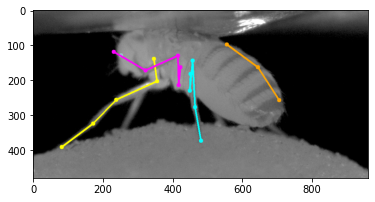

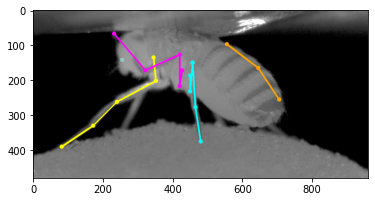

In [205]:
cam_id = 6
img_id = 311
plt.figure()
plt.imshow(camNet[cam_id].plot_2d(img_id, pts=camNet[cam_id].project(camNet.points3d[img_id])))

plt.figure()
plt.imshow(camNet[cam_id].plot_2d(img_id))
#plt.scatter(camNet[3].points2d[0][-1, 0], camNet[3].points2d[0][-1, 1])
proj = camNet[cam_id].project(camNet.points3d[img_id])
#plt.scatter(proj[-1,0], proj[-1,1])
#plt.scatter(proj[15,0], proj[19,1])

array([ 26.57347991,   6.58895776,   3.75216419,   4.75184681,
         8.54568771,  17.59894673,  16.40567629,   4.96749727,
         3.70092571,  20.45483946,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 167.96683555,  16.4494569 ,
        16.00007774,   4.35698367,   3.54382852,   5.36310724,
         9.91547643,  22.29923727,   4.47941315,   6.42820244,
        15.48783652,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 125.56098331])

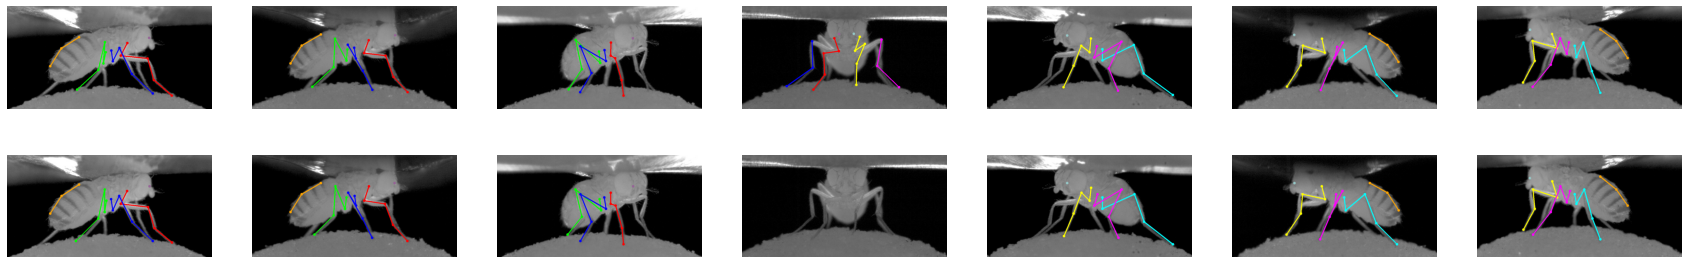

In [223]:
cam_id = 3
img_id = 1
fig, axs = plt.subplots(2, 7, figsize=(30,5))

for c in range(7):
    axs[0][c].imshow(camNet[c].plot_2d(img_id=img_id, pts=camNet[c].project(camNet.points3d[img_id])))
    axs[1][c].imshow(camNet[c].plot_2d(img_id=img_id))
    
    axs[0][c].axis('off')
    axs[1][c].axis('off')

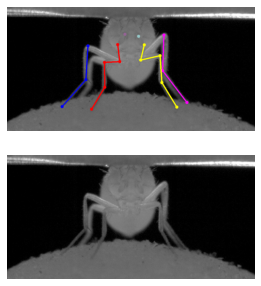

In [219]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(2, 1, figsize=(5,5))
axs = np.array(axs).flatten()
for ax in axs:
    ax.axis('off')
cam_id = 3
#img_id = 200

from celluloid import Camera
cam = Camera(fig)
for img_id in range(200, 400):
    #if err.sum((0,2))[img_id] < 400:
    axs[0].imshow(camNet[cam_id].plot_2d(img_id=img_id, pts=camNet[cam_id].project(camNet.points3d[img_id])))
    axs[1].imshow(camNet[cam_id].plot_2d(img_id=img_id))
    cam.snap()
    
cam.animate().save('test5.mp4')